# Clasificación dígitos

[Digits dataset](https://scikit-learn.org/1.5/auto_examples/datasets/plot_digits_last_image.html)

In [2]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

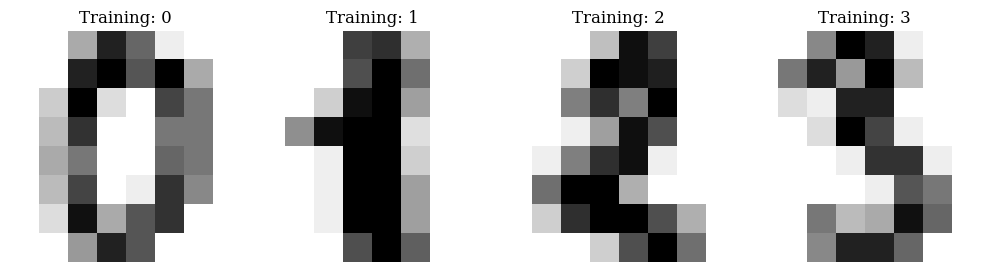

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
digits.images[0,:,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
digits.images[0,:,:].reshape(-1,1)

array([[ 0.],
       [ 0.],
       [ 5.],
       [13.],
       [ 9.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [13.],
       [15.],
       [10.],
       [15.],
       [ 5.],
       [ 0.],
       [ 0.],
       [ 3.],
       [15.],
       [ 2.],
       [ 0.],
       [11.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [12.],
       [ 0.],
       [ 0.],
       [ 8.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 5.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 9.],
       [ 8.],
       [ 0.],
       [ 0.],
       [ 4.],
       [11.],
       [ 0.],
       [ 1.],
       [12.],
       [ 7.],
       [ 0.],
       [ 0.],
       [ 2.],
       [14.],
       [ 5.],
       [10.],
       [12.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 6.],
       [13.],
       [10.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [7]:
data.shape

(1797, 64)

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, train_size=.7
)

## Modelos

In [10]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

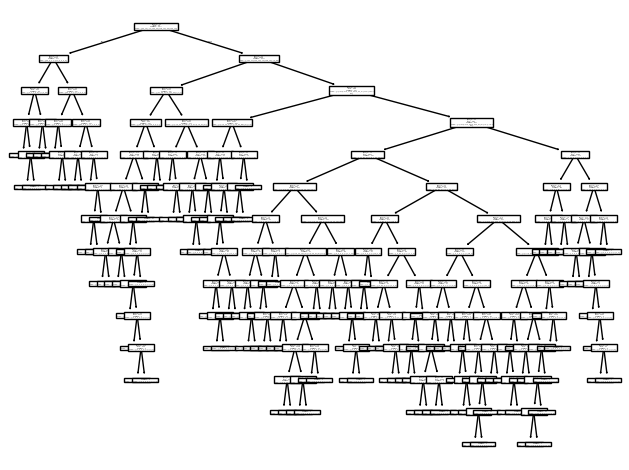

In [11]:
tree.plot_tree(clf);

In [12]:
y_pred = clf.predict(X_test)

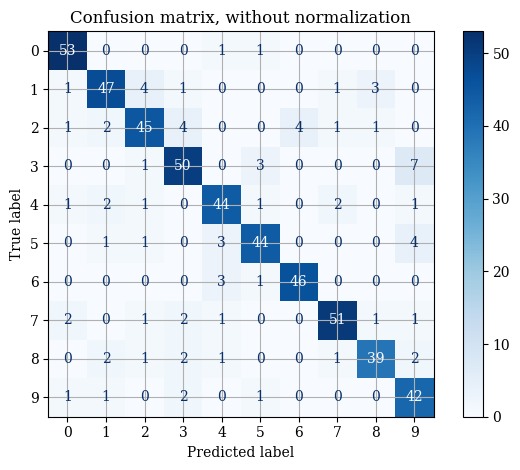

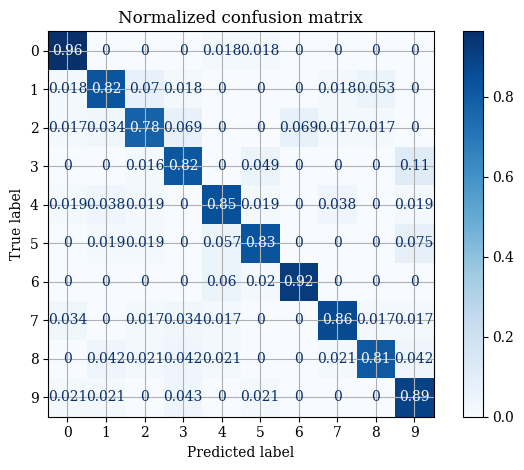

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# y_pred should be integer class IDs 0..9
# If you have probabilities (shape [n_samples, 10]), do: y_pred = probs.argmax(axis=1)
class_names = np.arange(10)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        labels=class_names,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)


plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.8983    0.9636    0.9298        55
           1     0.8545    0.8246    0.8393        57
           2     0.8333    0.7759    0.8036        58
           3     0.8197    0.8197    0.8197        61
           4     0.8302    0.8462    0.8381        52
           5     0.8627    0.8302    0.8462        53
           6     0.9200    0.9200    0.9200        50
           7     0.9107    0.8644    0.8870        59
           8     0.8864    0.8125    0.8478        48
           9     0.7368    0.8936    0.8077        47

    accuracy                         0.8537       540
   macro avg     0.8553    0.8551    0.8539       540
weighted avg     0.8560    0.8537    0.8537       540



### Red neuronal

In [23]:
# TensorFlow/Keras MLP on scikit-learn digits
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# 3) Normalize input features: original pixels are in [0,16]
X_train = X_train / 16.0
X_test  = X_test  / 16.0

# 4) Build a small MLP
#    Using SparseCategoricalCrossentropy so we can keep integer labels.
def build_model(input_dim=64, num_classes=10):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),

        layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"]
    )
    return model

model = build_model()

# 5) Train with early stopping
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    )
]

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# 6) Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# 7) Classification report + confusion matrix
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3353 - loss: 1.9455 - val_accuracy: 0.4960 - val_loss: 1.9659
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7095 - loss: 0.9889 - val_accuracy: 0.7857 - val_loss: 1.5870
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.6652 - val_accuracy: 0.8532 - val_loss: 1.2730
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.4602 - val_accuracy: 0.8968 - val_loss: 1.0109
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8836 - loss: 0.4015 - val_accuracy: 0.9246 - val_loss: 0.7686
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9055 - loss: 0.3373 - val_accuracy: 0.9286 - val_loss: 0.5824
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9154 - loss: 0.2943 - val_accuracy: 0.9405 - val_loss: 0.4500
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9284 - loss: 0.2510 - val_accuracy: 0.9484 - v